## Analysis of final data from act_wrangle .ipynb

### Analyzing and Visualizing Data
### Insights
> Which dog stage had the highest number of dogs<br>
> Which was the source with many tweets<br>
> Which was the source with many tweets<br>
> Is retweet count related to favourite count<br>
> Which days and which hours do people tweet most

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv('twitter_archive_master.csv')
data.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed_pred,prediction_conf
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7001,33801,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5299,29301,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581


In [3]:
data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num',
       'dog_breed_pred', 'prediction_conf'],
      dtype='object')

In [4]:
data.shape

(1986, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   int64  
 1   timestamp           1986 non-null   object 
 2   source              1986 non-null   object 
 3   text                1986 non-null   object 
 4   expanded_urls       1986 non-null   object 
 5   rating_numerator    1986 non-null   int64  
 6   rating_denominator  1986 non-null   int64  
 7   name                1343 non-null   object 
 8   dog_stage           305 non-null    object 
 9   retweet_count       1986 non-null   int64  
 10  favorite_count      1986 non-null   int64  
 11  jpg_url             1986 non-null   object 
 12  img_num             1986 non-null   int64  
 13  dog_breed_pred      1678 non-null   object 
 14  prediction_conf     1678 non-null   float64
dtypes: float64(1), int64(6), object(8)
memory usage: 232.9+

In [6]:
data.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,prediction_conf
count,1.986000e+03,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1678.000000
mean,7.356142e+17,12.281974,10.534240,2242.050352,7706.494461,1.203424,0.549148
std,6.740686e+16,41.581180,7.335369,4016.323788,11369.597465,0.561492,0.299301
min,6.660209e+17,0.000000,2.000000,11.000000,66.000000,1.000000,0.000010
25%,6.758214e+17,10.000000,10.000000,494.500000,1636.250000,1.000000,0.300525
50%,7.082494e+17,11.000000,10.000000,1079.000000,3463.500000,1.000000,0.548901
75%,7.873791e+17,12.000000,10.000000,2556.750000,9554.500000,1.000000,0.821694
max,8.924206e+17,1776.000000,170.000000,70681.000000,144807.000000,4.000000,0.999956


### Which dog stage had the highest number of dogs

In [7]:
data['dog_stage'].value_counts(normalize=True)

pupper          0.665574
doggo           0.203279
puppo           0.072131
doggopupper     0.029508
floofer         0.022951
doggofloofer    0.003279
doggopuppo      0.003279
Name: dog_stage, dtype: float64

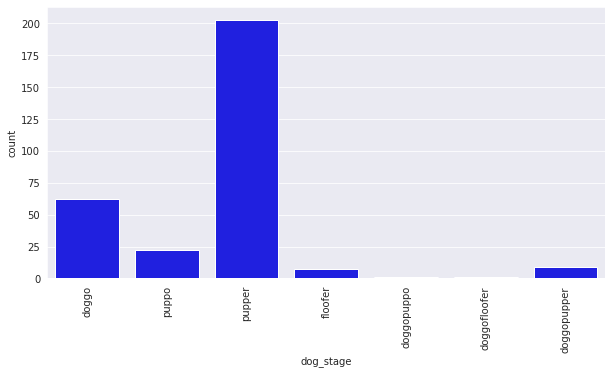

In [8]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='dog_stage', data=data, color='blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

> Pupper was the stage with most dogs in it, aproximately 66% of the dogs, follwed by doggo stage with 21% of the dogs 

### Which was the source with many tweets

In [9]:
data['source'].value_counts()

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

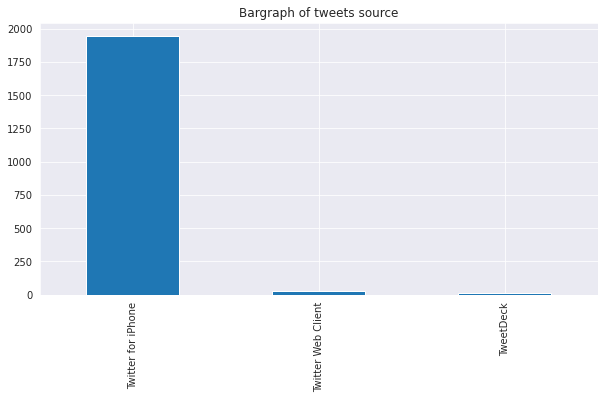

In [10]:
plt.figure(figsize=(10,5))
data['source'].value_counts().plot(kind='bar')
plt.title("Bargraph of tweets source")
plt.show()

**twitter for iphone was the most device for tweeting**

### Is retweet count related to favourite count

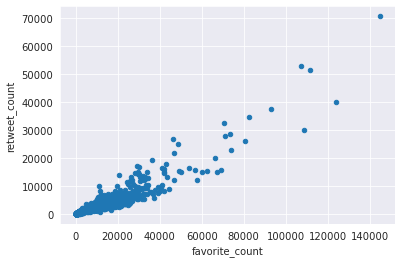

In [11]:
data.plot.scatter(x='favorite_count', y='retweet_count');

**favorite count has a positive linear regression with retweet_count, for example the more the likes the more the retweets**

### Whats the mean of model prediction confidence

In [12]:
data['prediction_conf'].mean()

0.5491476097468414

**model had a mean of 0.55 prediction confidence of True predicted dog images**

### Which days and which hours do people tweet most

In [13]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [14]:
data['hour'] = data['timestamp'].dt.hour
data['hour'].head()

0    16
1     0
2     0
3    15
4    16
Name: hour, dtype: int64

In [15]:
data['hour'].value_counts()

1     275
0     252
2     210
16    193
3     170
17    159
23    109
18     99
4      96
15     91
19     81
20     75
21     71
22     67
5      26
14      8
6       3
13      1
Name: hour, dtype: int64

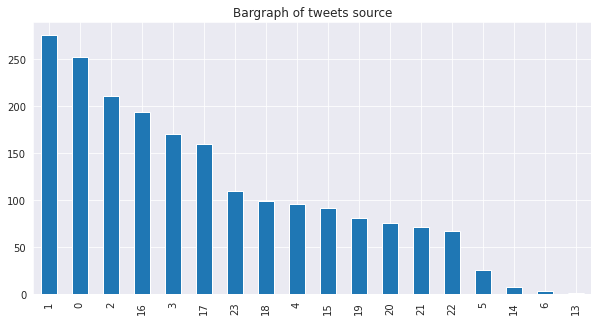

In [16]:
plt.figure(figsize=(10,5))
data['hour'].value_counts().plot(kind='bar')
plt.title("Bargraph of tweets source")
plt.show()

**many tweets were at 01:00,followed by 00:00 thn 02:00 respectively**

In [17]:
data['weekday'] = data['timestamp'].dt.dayofweek
data['weekday'].head(5)

0    1
1    1
2    0
3    6
4    5
Name: weekday, dtype: int64

In [18]:
# The day of the week with Monday=0, Sunday=6.
data['weekday'].value_counts()

0    326
2    295
1    295
4    281
3    281
6    256
5    252
Name: weekday, dtype: int64

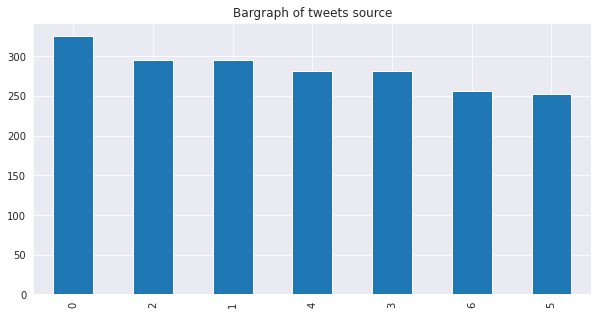

In [19]:
plt.figure(figsize=(10,5))
data['weekday'].value_counts().plot(kind='bar')
plt.title("Bargraph of tweets source")
plt.show()

**most people tweet on monday**<br>
**more people tweet on weedays compared to weekends**